In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

df = pd.read_csv("eda_outliers_dataset1.csv")
df.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


In [12]:
def readable_numbers(x):
    """takes a large number and format it into k,M to make it more readable"""
    if x >=1e6:
        s= '{:1.1f}M'.format(x*1e-6)
    else:
        s='{:1.0f}K'.format(x*1e-3)
    return s
# use the readable_number() function to create a new column
df['number_of_strikes_readable'] =df['number_of_strikes'].apply(readable_numbers)

In [55]:
df.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


In [17]:
print("Mean:" + readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df['number_of_strikes'])))

Mean:26.8M
Median:28.3M


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Local\Temp\ipykernel_3504\786337425.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))


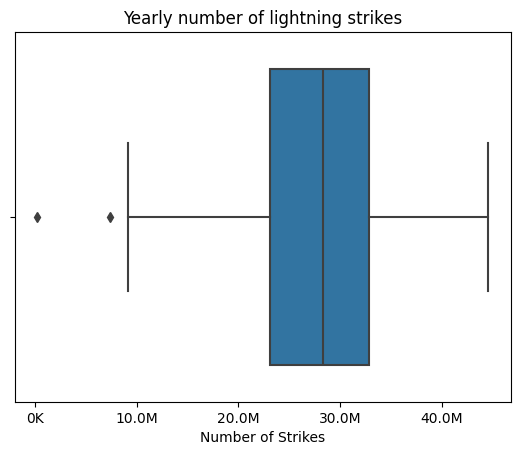

In [56]:
#Create boxplot
box = sns.boxplot(x=df['number_of_strikes'])
g = plt.gca()
box.set_xticklabels(np.array([readable_numbers(x) for x in g.get_xticks()]))
plt.xlabel('Number of Strikes')
plt.title('Yearly number of lightning strikes');

In [57]:
# Any values that fall 1.5 times below our blue bos is the outliers
# Calculate 25th percntile of annual strikes
percentile25 = df['number_of_strikes'].quantile(0.25)
# Calculate 75th percntile of annual strikes
percentile75 = df['number_of_strikes'].quantile(0.75)

In [58]:
# Calculate interquartile range
iqr = percentile75 -percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5* iqr
lower_limit = percentile25 - 1.5* iqr

In [59]:
print('Lower limit is: ' + readable_numbers(lower_limit))

Lower limit is: 8.6M


In [60]:
# Isolate outliers on low end
df[df['number_of_strikes']< lower_limit]

,year,number_of_strikes
1,2019,209166
33,1987,7378836


In [61]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.5, y[i]+0.05, s = readable_numbers(y[i]))

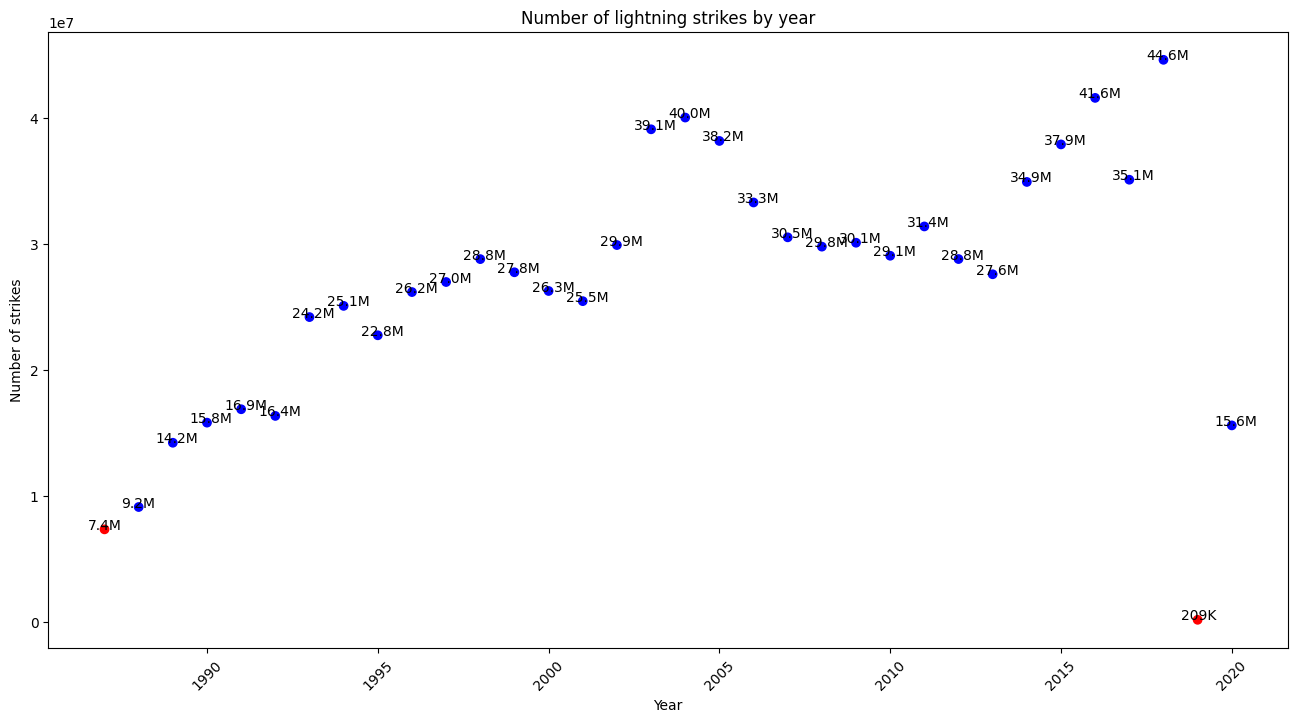

In [36]:
colours =np.where(df['number_of_strikes'] < lower_limit, 'r', 'b')

fig, ax = plt.subplots(figsize =(16,8))
ax.scatter(df['year'], df['number_of_strikes'], c=colours)
ax.set_xlabel('Year')
ax.set_ylabel('Number of strikes')
ax.set_title('Number of lightning strikes by year')
addlabels(df['year'], df['number_of_strikes'])
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

In [62]:
df_2019 = pd.read_csv('eda_outliers_dataset2.csv')
df_2019.head()

# Convert 'date' column to datetime
df_2019['date'] = pd.to_datetime(df_2019['date'])

In [63]:
#Create 2 new columns
df_2019['month'] =df_2019['date'].dt.month
df_2019['month_txt'] =df_2019['date'].dt.month_name(). str.slice(stop=3)

# Group by 'month' and 'month_txt', um it, and sort. assign result to new df
df_2019_by_month = df_2019.groupby(['month','month_txt']).sum('numeric only').sort_values('month', ascending = True).head(10)
df_2019_by_month

,,number_of_strikes
month,month_txt,
12,Dec,209166


In [64]:
df_1987 = pd.read_csv('eda_outliers_dataset3.csv')
df_1987.head()

# Convert 'date' column to datetime
df_1987['date'] = pd.to_datetime(df_1987['date'])

In [50]:
#Create 2 new columns
df_1987['month'] =df_1987['date'].dt.month
df_1987['month_txt'] =df_1987['date'].dt.month_name(). str.slice(stop=3)

# Group by 'month' and 'month_txt', um it, and sort. assign result to new df
df_1987_by_month = df_1987.groupby(['month','month_txt']).sum('numeric only').sort_values('month', ascending = True).head(12)
df_1987_by_month

,,number_of_strikes
month,month_txt,
1,Jan,23044
2,Feb,61020
3,Mar,117877
4,Apr,157890
5,May,700910
6,Jun,1064166
7,Jul,2077619
8,Aug,2001899
9,Sep,869833


In [67]:
#Create new df that removes outliers
df_without_outliers = df[df['number_of_strikes'] >= lower_limit]

# Recalculate means and median values on data without outliers
print("Mean:" + readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df_without_outliers['number_of_strikes'])))

Mean:28.2M
Median:28.8M
